# Correlation between stocks
- measures association
- the degree to which two varialbles move in relation to each other
- Finance: the coorolation can measure the movement of a stock with that of a benchamrk index, such as the S&P 500


### Formula
- $r = \frac{\sum(X - \bar{X})(Y - \bar{Y})}{\sqrt{\sum(X - \bar{X})^2 \sum(Y - \bar{Y})^2}}$
- $r$: the correlation factor
- $\bar{X}$: the average observations of $X$
- $\bar{Y}$: the average observations of $Y$


- $r$ ranges between -1 and 1 (both inclusive)
- $r = 1$: Perfect positive correlation
- $r = -1$: Perfect negative correlation
- $r = 0$: No correlation at all


In [4]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt 
import numpy as np
import yfinance as yf
#for pdr to overvrite with yfinance
yf.pdr_override()
from datetime import datetime


In [18]:
tickers = ["AAPL", "TWTR", "IBM", "PLTR"]
data = pdr.get_data_yahoo(tickers, datetime(2021, 1, 1))
start = datetime(2021, 1, 1)

[*********************100%***********************]  4 of 4 completed


In [9]:
data = data["Adj Close"]

In [15]:
data

,AAPL,IBM,PLTR,TWTR
Date,,,,
2021-01-04 00:00:00-05:00,127.680016,106.178673,23.370001,54.529999
2021-01-05 00:00:00-05:00,129.258591,108.063393,24.600000,53.880001
2021-01-06 00:00:00-05:00,124.907570,110.761993,23.540001,53.259998
2021-01-07 00:00:00-05:00,129.169800,110.504974,25.000000,52.330002
2021-01-08 00:00:00-05:00,130.284698,110.110886,25.200001,51.480000
...,...,...,...,...
2023-02-13 00:00:00-05:00,153.850006,137.350006,7.610000,NaN
2023-02-14 00:00:00-05:00,153.199997,136.009995,9.220000,NaN
2023-02-15 00:00:00-05:00,155.330002,136.399994,10.110000,NaN


In [11]:
log_returns = np.log(data/data.shift())

In [16]:
log_returns.corr()

,AAPL,IBM,PLTR,TWTR
AAPL,1.000000,0.303791,0.467284,0.318353
IBM,0.303791,1.000000,0.049552,0.053825
PLTR,0.467284,0.049552,1.000000,0.292877
TWTR,0.318353,0.053825,0.292877,1.000000


In [19]:
sp500 = pdr.get_data_yahoo("^GSPC", start)

[*********************100%***********************]  1 of 1 completed


In [22]:
log_returns["SP500"] = np.log(sp500["Adj Close"]/sp500["Adj Close"].shift())

In [25]:
log_returns.corr()

,AAPL,IBM,PLTR,TWTR,SP500
AAPL,1.000000,0.303791,0.467284,0.318353,0.821091
IBM,0.303791,1.000000,0.049552,0.053825,0.431267
PLTR,0.467284,0.049552,1.000000,0.292877,0.501069
TWTR,0.318353,0.053825,0.292877,1.000000,0.373670
SP500,0.821091,0.431267,0.501069,0.373670,1.000000


In [27]:
def test_coorelation(ticker):
    df = pdr.get_data_yahoo(ticker, start)
    lr = log_returns.copy()
    lr[ticker] = np.log(df["Adj Close"]/df["Adj Close"].shift())
    return lr.corr()

In [28]:
test_coorelation("TLT")

[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,PLTR,TWTR,SP500,TLT
AAPL,1.000000,0.303791,0.467284,0.318353,0.821091,0.049926
IBM,0.303791,1.000000,0.049552,0.053825,0.431267,-0.078155
PLTR,0.467284,0.049552,1.000000,0.292877,0.501069,0.075379
TWTR,0.318353,0.053825,0.292877,1.000000,0.373670,-0.026438
SP500,0.821091,0.431267,0.501069,0.373670,1.000000,0.034269
TLT,0.049926,-0.078155,0.075379,-0.026438,0.034269,1.000000


In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [37]:
def visulaize_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start)
    df= df["Adj Close"]
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax=ax)

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


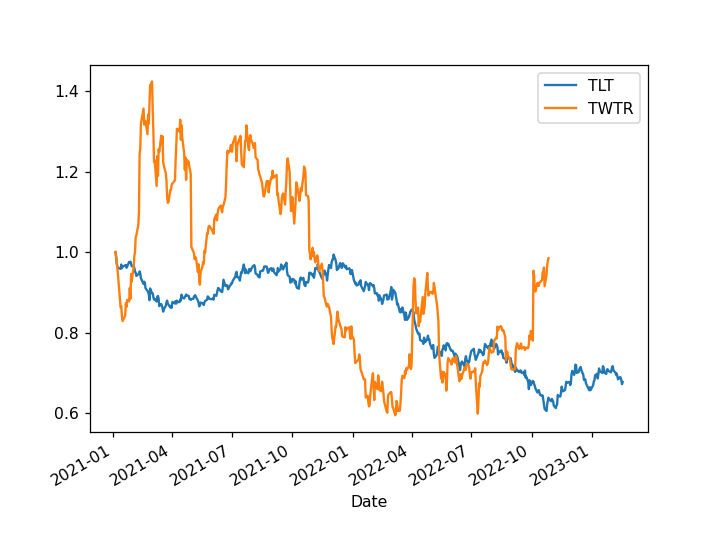

In [38]:
visulaize_correlation("TWTR", "TLT")

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


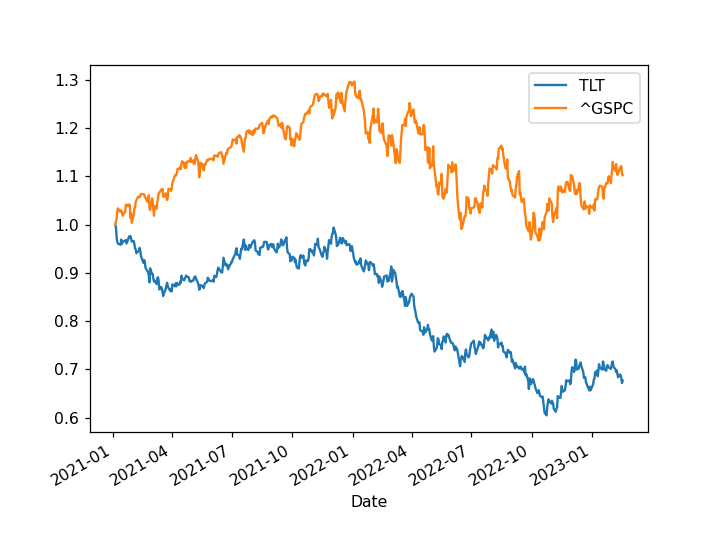

In [39]:
visulaize_correlation("^GSPC", "TLT")